Это лекция 10 дз 10!!!

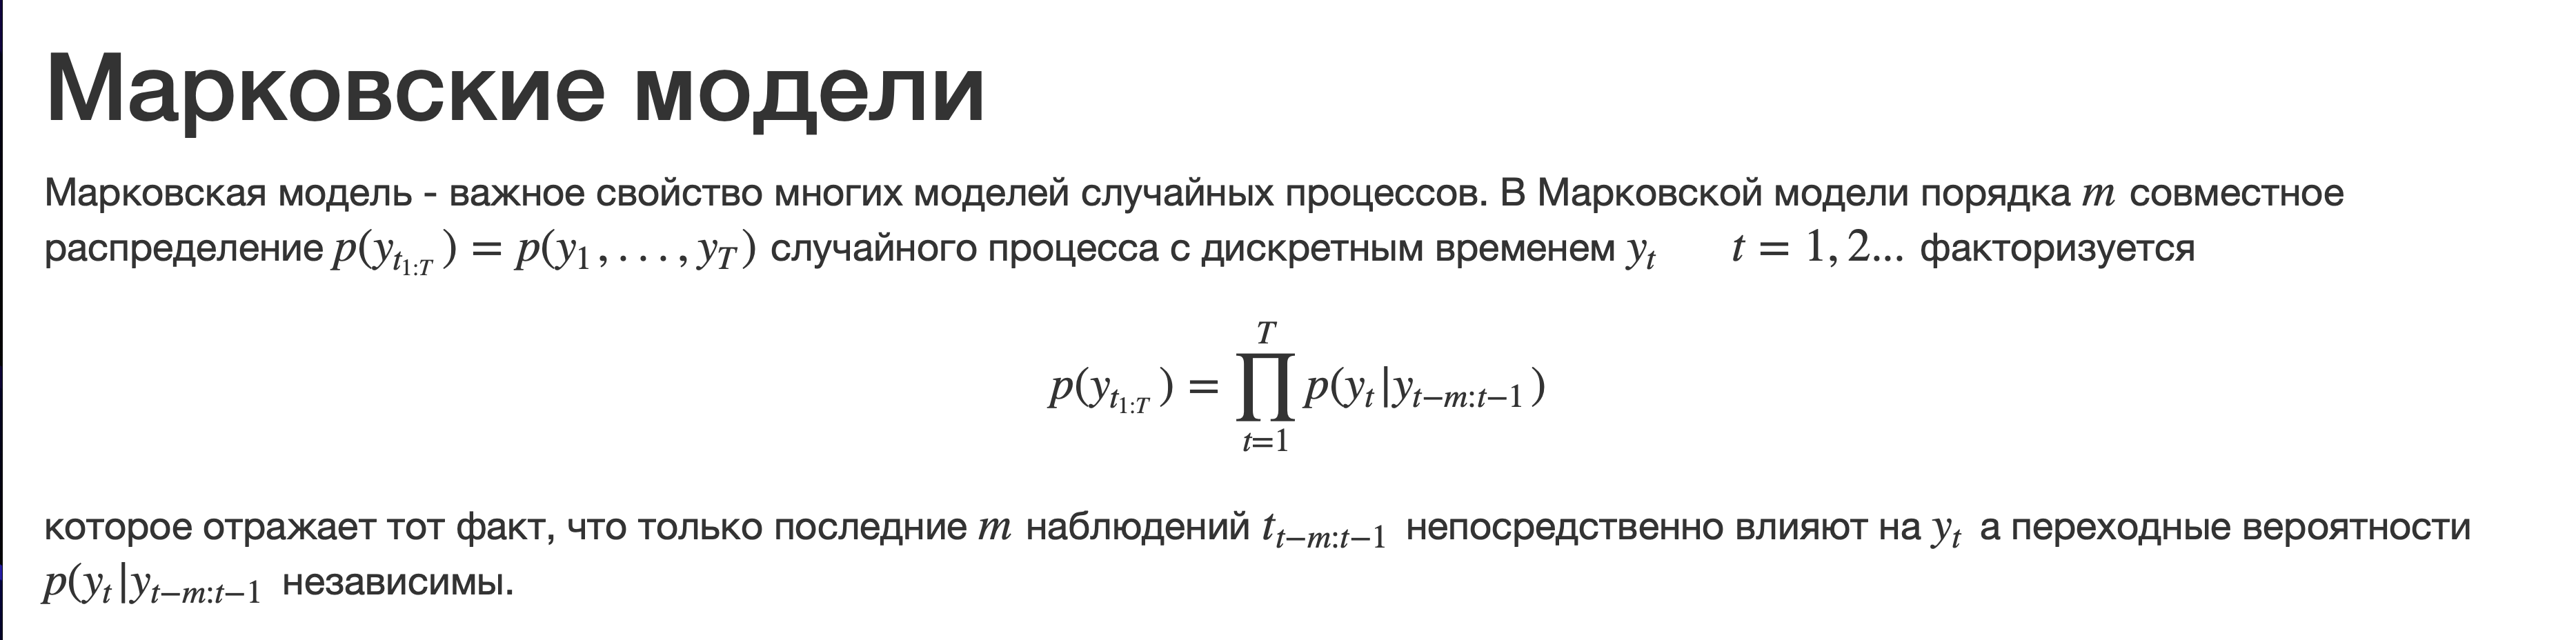

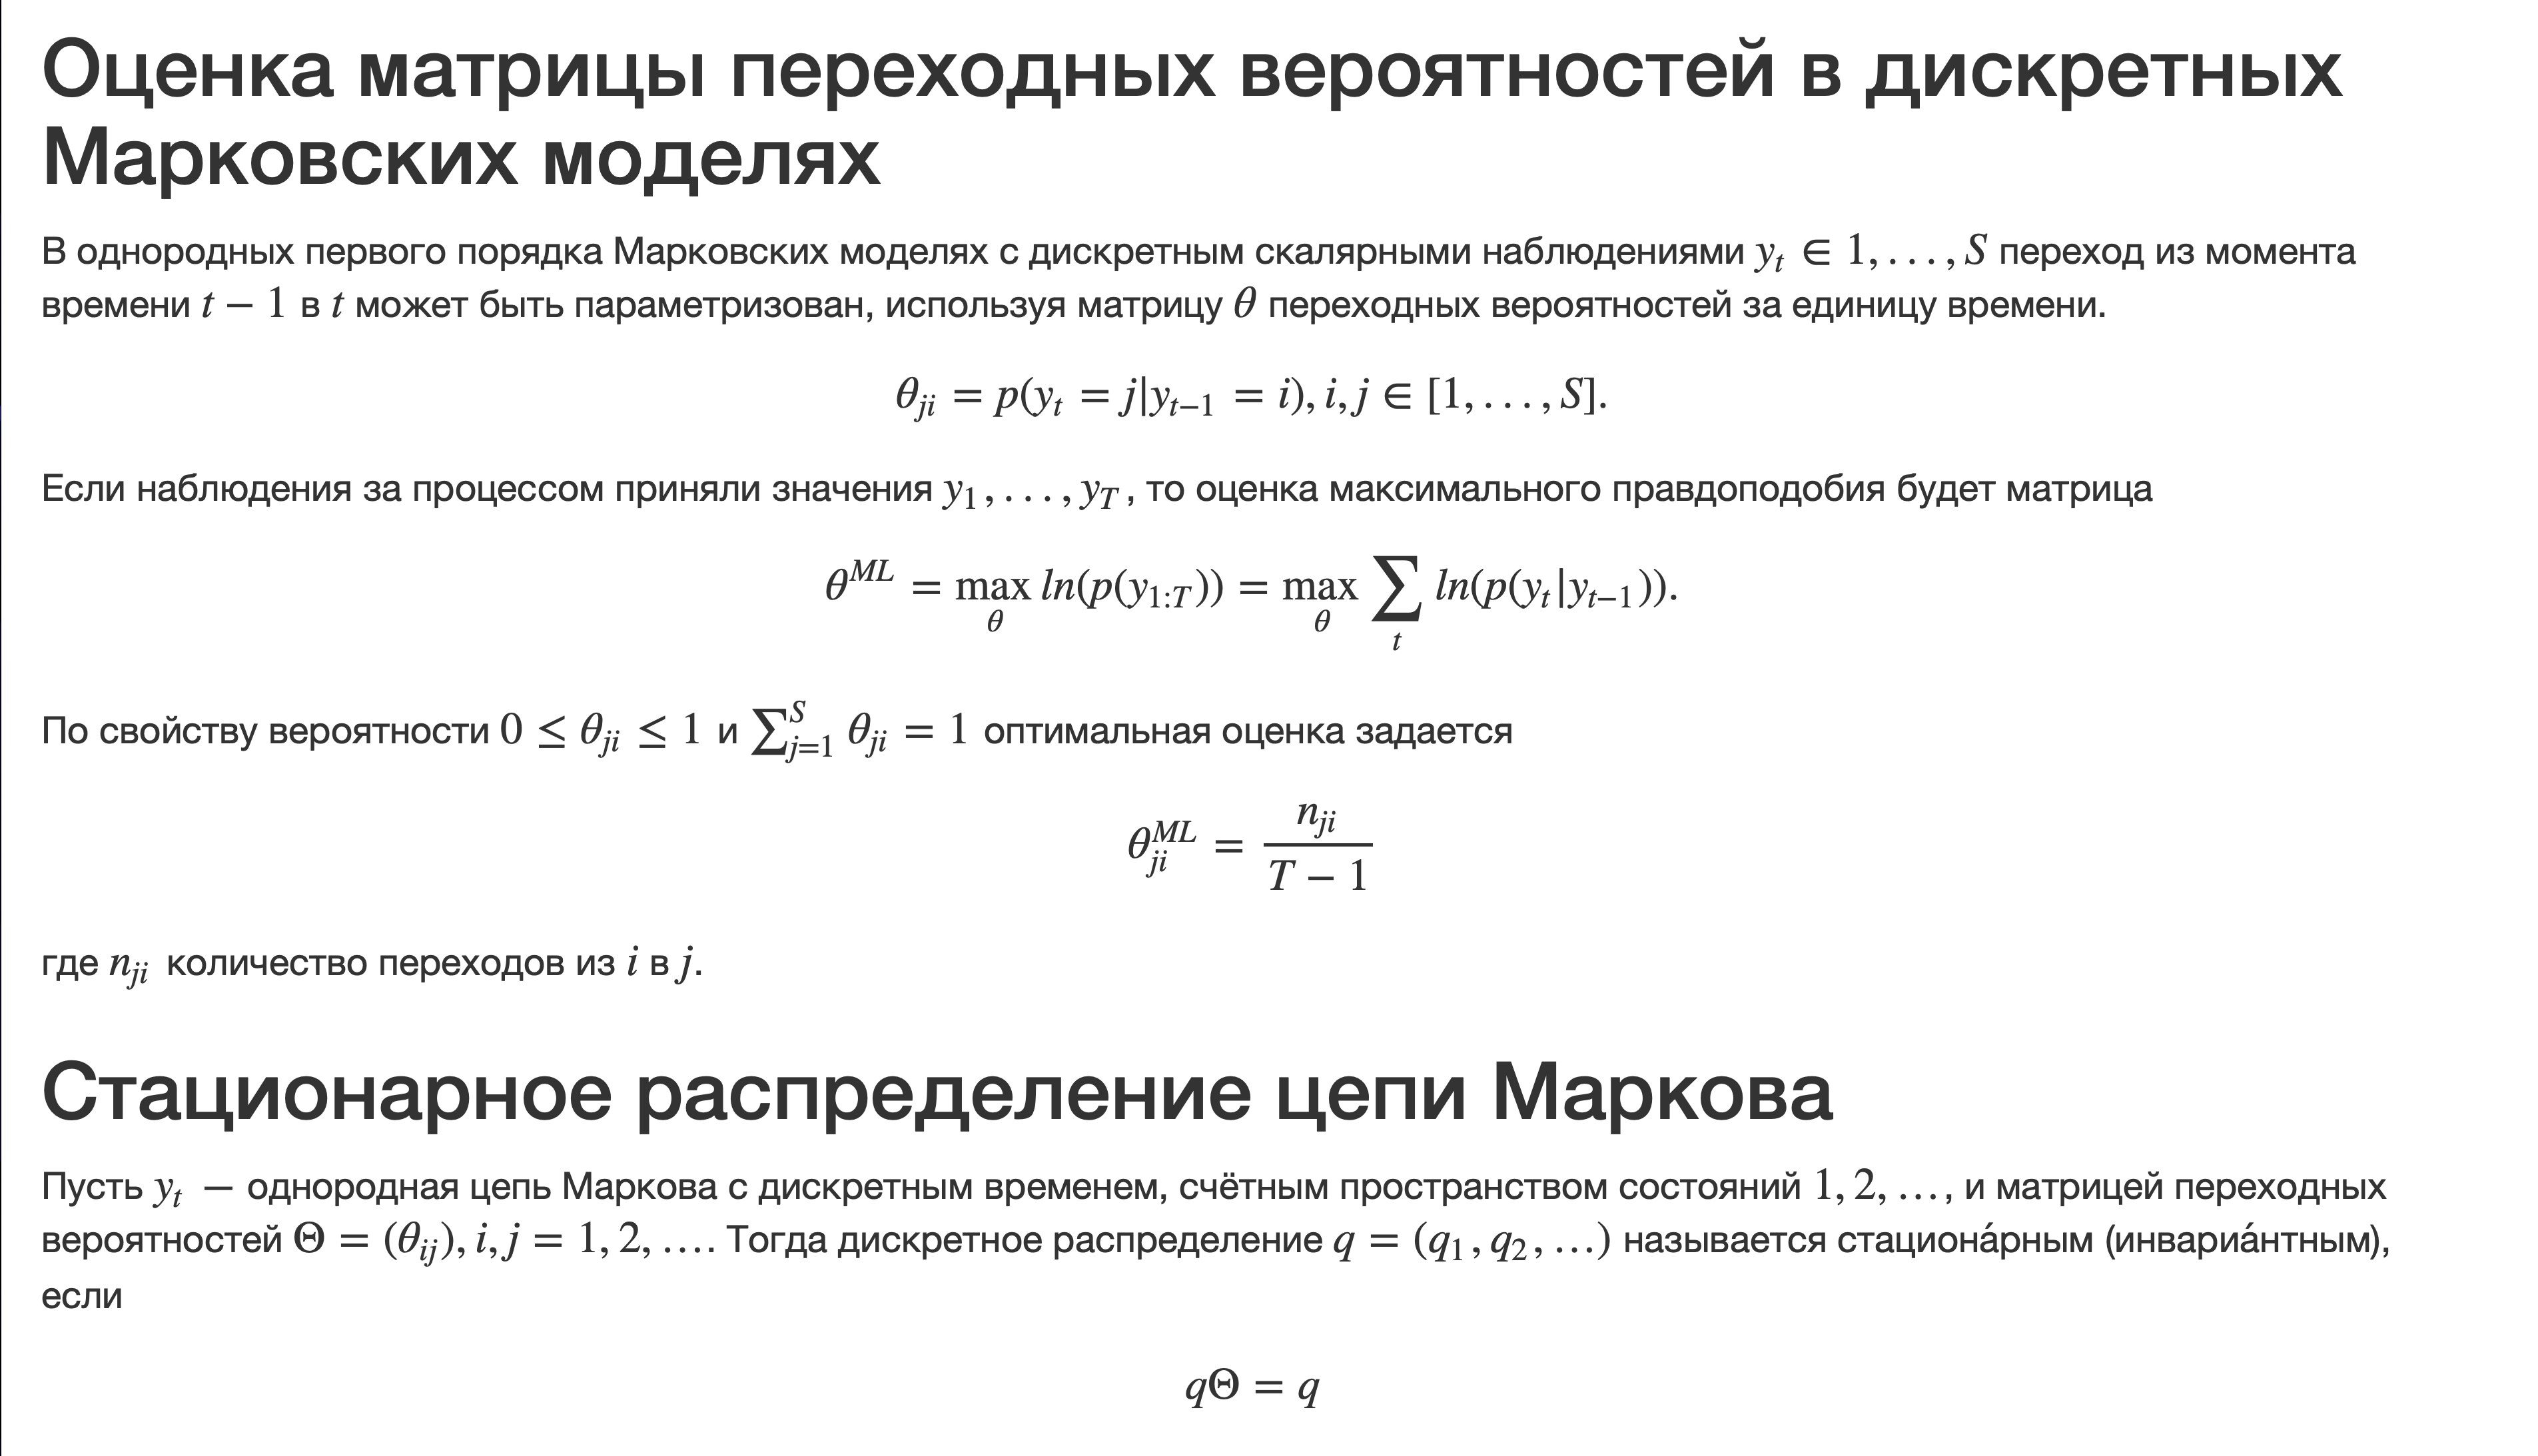

In [ ]:
data <- read.csv("question_10.csv",header = T)
head(data)


,VOL
,<int>
1,3544410
2,954800
3,3218600
4,1966950
5,1090620
6,3640710


In [ ]:
install.packages("xts")
install.packages("markovchain")
install.packages("depmixS4")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘igraph’, ‘RcppArmadillo’




In [ ]:
library(xts)
library(markovchain)
library(depmixS4)

set.seed(100)

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Package:  markovchain
Version:  0.9.5
Date:     2023-09-24 09:20:02 UTC
BugReport: https://github.com/spedygiorgio/markovchain/issues



Attaching package: ‘markovchain’


The following object is masked from ‘package:zoo’:

    is.regular


Loading required package: nnet

Loading required package: MASS

Loading required package: Rsolnp

Loading required package: nlme



In [ ]:
S <- data[,1]
r <- S[2:length(S)] / S[1:length(S)-1] - 1 # ряд доходностей
head(r)

[1] -0.73061807  2.37096774 -0.38888026 -0.44552734  2.33820212  0.02945854

In [ ]:
# Create and fit the Hidden Markov Model (Скрытая марковская модель HММ)
hmm <- depmix(r ~ 1, family = gaussian(), nstates = 3, data=data.frame(r=r))
hmmfit <- fit(hmm, verbose = FALSE)
hmm <- markovchainFit(data = hmmfit@posterior$state, method = "mle", name = "Alofi")

converged at iteration 122 with logLik: -5068.478 


In [ ]:
trmatr <- hmm$estimate@transitionMatrix # переходные вероятности

States <- c("1", "2", "3")
colnames(trmatr) <- States
rownames(trmatr) <- States

trmatr <- as.matrix(trmatr)
trmatr


,1,2,3
1,0.01002506,0.9147870,0.07518797
2,0.09094600,0.5192854,0.38976857
3,0.14074074,0.6740741,0.18518519


In [ ]:
mc= new("markovchain", states = States,
        byrow = TRUE, transitionMatrix = trmatr,
        name = "R")
mc

R 
 A  3 - dimensional discrete Markov Chain defined by the following states: 
 1, 2, 3 
 The transition matrix  (by rows)  is defined as follows: 
           1         2          3
1 0.01002506 0.9147870 0.07518797
2 0.09094600 0.5192854 0.38976857
3 0.14074074 0.6740741 0.18518519


In [ ]:
steady_states = steadyStates(mc) # cтационарное распределение вероятностей
steady_states

1,2,3
0.09786608,0.6041207,0.2980132


In [ ]:
result <- list(
  r, # доходности
  trmatr = trmatr, #матрица переходных вероятностей
  steady_states = steady_states #стационарное распределение вероятностей
)

head(result)

[[1]]
   [1] -7.306181e-01  2.370968e+00 -3.888803e-01 -4.455273e-01  2.338202e+00
   [6]  2.945854e-02 -5.574339e-01 -5.712959e-01 -7.259738e-01  4.253823e-01
  [11] -8.190819e-02 -1.758039e-01 -3.158396e-01  4.627763e+01 -7.387810e-01
  [16] -2.153195e-01 -6.377833e-02 -4.604193e-01  9.508886e-01  1.637794e-01
  [21] -6.779672e-02  3.708929e-01 -8.157386e-01 -3.252465e-01  3.576576e-01
  [26] -4.709210e-01 -3.042763e-02  2.583014e+01 -3.902877e-01 -5.127738e-01
  [31] -7.709498e-02 -1.826749e-01  3.523583e+00 -5.433748e-01 -6.830614e-01
  [36]  1.652276e+00 -8.935905e-01  1.140239e-01  1.682888e-01  6.121324e-01
  [41] -7.406293e-01  1.886390e+01  1.381268e+00  9.608165e-01 -5.584809e-01
  [46]  6.618334e-01 -6.331090e-01 -4.067912e-01 -3.503824e-01  6.205415e-01
  [51] -7.806439e-01 -1.920363e-01  2.243772e-01 -4.192906e-01  9.387794e-01
  [56]  1.452814e+01 -6.348777e-01 -1.922322e-01 -3.514765e-01 -2.385086e-01
  [61]  1.720606e+00 -3.787426e-01  1.876558e-01 -1.424183e-01 -8.756606e-01
  [66] -3.956178e-02  1.549218e+00 -6.549345e-01 -3.154229e-01  1.112919e+02
  [71] -4.395172e-01  2.825013e-01  8.832874e-01  3.133203e-01  1.794986e+00
  [76] -8.167474e-01  4.297454e-01 -1.673211e-01 -5.378255e-02 -4.498795e-01
  [81]  1.548688e-01 -2.415074e-01 -5.676066e-01  1.486834e+01 -5.745901e-01
  [86] -6.055352e-01 -3.791785e-02 -4.588249e-01 -4.542438e-01  1.651245e+00
  [91] -1.860198e-01 -5.118728e-01 -6.494579e-01  5.182754e-01 -1.507653e-01
  [96] -2.967636e-01 -4.199201e-01  5.067345e+01 -3.633551e-01 -4.184084e-01
 [101] -5.817740e-01  3.593233e+00  1.421875e+00 -5.780751e-01 -5.972220e-01
 [106] -4.291467e-01 -6.861371e-01  7.821931e-02  4.136004e-01 -4.549580e-01
 [111]  5.277710e-01  1.302397e+01 -3.230091e-01 -6.650297e-01 -2.938579e-01
 [116]  1.046442e+00 -4.644540e-01  2.310001e-01 -1.432835e-01 -6.335642e-01
 [121] -8.171159e-02 -2.099732e-01 -2.274432e-01 -3.509816e-01 -3.309031e-02
 [126]  5.348424e+01 -4.648761e-01 -1.619590e-01  6.298588e-01 -6.327956e-01
 [131] -2.342844e-01  9.231906e-01 -6.150440e-01 -4.073542e-01 -6.864471e-01
 [136]  9.886818e-01 -6.145915e-01  3.035261e+00 -3.702562e-02  8.659580e+00
 [141] -3.335322e-01 -3.695723e-01 -5.693046e-01  3.211370e-01  3.134806e-01
 [146] -4.059558e-01  8.269750e-01 -3.506405e-01 -5.321172e-01 -5.064901e-01
 [151] -8.645132e-02  1.385798e+00 -3.266335e-01  1.324252e+01 -6.638889e-01
 [156] -4.894364e-01  4.915998e-01 -3.448184e-01 -1.596935e-01  6.052436e+00
 [161] -7.748655e-01 -5.327676e-01 -4.917206e-01 -1.565603e-01 -1.798371e-02
 [166]  4.053010e+00 -8.109267e-01  1.045404e+01 -5.878835e-01 -3.893033e-01
 [171]  2.336121e+00 -4.883172e-01 -3.827450e-01  8.490824e-01 -2.486965e-01
 [176] -1.784650e-01  2.632952e+00 -6.161731e-01 -5.129871e-01 -1.271012e-01
 [181]  1.054656e+00  1.671496e+01 -5.241965e-01  6.379769e-01 -4.375381e-01
 [186] -5.928483e-01  4.048819e-01 -3.081690e-01 -3.191033e-01 -6.812128e-01
 [191]  2.326876e-01 -7.110633e-01 -5.406897e-02  3.412871e-01  2.430282e-01
 [196]  1.013794e+01 -7.463452e-01 -4.242543e-01  1.419012e+00 -3.642489e-01
 [201] -7.436459e-02 -1.199129e-02  6.704044e-01 -6.543619e-01 -5.614800e-01
 [206]  2.307073e-01  3.908277e-01 -6.748670e-01 -1.958113e-02  2.781997e+01
 [211] -1.905974e-01 -2.996446e-01 -6.242029e-01  2.745927e-01  1.457839e-02
 [216] -4.980532e-01  3.057928e-01 -4.732778e-01 -4.568704e-01 -4.034998e-01
 [221] -5.133847e-02  5.576859e-01 -1.747510e-01  1.468939e+01  9.987695e-01
 [226] -6.501603e-01  6.299977e-02 -6.731696e-01 -4.736809e-02  1.777564e+00
 [231] -5.122705e-01 -4.358509e-01  1.176640e+00 -7.497652e-01  3.798130e-01
 [236] -3.671117e-01 -4.634265e-01  5.577120e+01 -7.059842e-01 -2.747633e-01
 [241]  2.888493e-01 -4.536982e-01 -3.218339e-01  2.348707e-01  7.813442e-02
 [246] -4.158443e-01 -3.623398e-01 -4.395774e-01  8.265497e-02  1.202637e+00
 [251] -6.696271e-01  3.380321e+01 -6.243892e-01  5.474492e-01 -5.854949e-01
 [256]  1.510086e-01  3.086308e-01  3.174564e-01  7.530531e-01 -9.8